In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
data = '../../data/raw'
%matplotlib inline
import random
import string

In [5]:
train = pd.read_csv('../../data/raw/train.csv')
depths = pd.read_csv('../../data/raw/depths.csv')

In [11]:
x=1157
img = cv2.imread(data+'/train/images/'+train.iloc[x][0]+'.png')
out = cv2.imread(data+'/train/masks/'+train.iloc[x][0]+'.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [19]:
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [35]:
for i in range(4000):
    img = cv2.imread(data+'/train/images/'+train.iloc[i][0]+'.png')
    out = cv2.imread(data+'/train/masks/'+train.iloc[i][0]+'.png')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    out = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
    rows,cols = img.shape
    M1 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    M2 = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
    M3 = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
    M4 = cv2.getRotationMatrix2D((cols/2,rows/2),360,1)
    in_1 = cv2.warpAffine(img,M1,(cols,rows))
    in_2 = cv2.warpAffine(img,M2,(cols,rows))
    in_3 = cv2.warpAffine(img,M3,(cols,rows))
    in_4 = cv2.warpAffine(img,M4,(cols,rows))
    out_1  = cv2.warpAffine(out,M1, (cols,rows))
    out_2  = cv2.warpAffine(out,M2, (cols,rows))   
    out_3  = cv2.warpAffine(out,M3, (cols,rows))   
    out_4  = cv2.warpAffine(out,M4, (cols,rows))
    cv2.imwrite('../../data/processed/train/images/'+train.iloc[i][0]+'_00.png',in_1)
    cv2.imwrite('../../data/processed/train/images/'+train.iloc[i][0]+'_01.png',in_2)
    cv2.imwrite('../../data/processed/train/images/'+train.iloc[i][0]+'_02.png',in_3)
    cv2.imwrite('../../data/processed/train/images/'+train.iloc[i][0]+'_03.png',in_4)
    cv2.imwrite('../../data/processed/train/masks/'+train.iloc[i][0]+'_00.png',out_1)
    cv2.imwrite('../../data/processed/train/masks/'+train.iloc[i][0]+'_01.png',out_2)
    cv2.imwrite('../../data/processed/train/masks/'+train.iloc[i][0]+'_02.png',out_3)
    cv2.imwrite('../../data/processed/train/masks/'+train.iloc[i][0]+'_03.png',out_4)

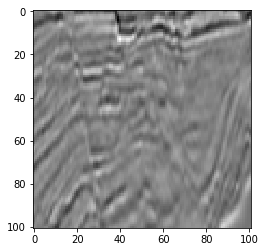

In [28]:
plt.imshow(img,cmap='gray')

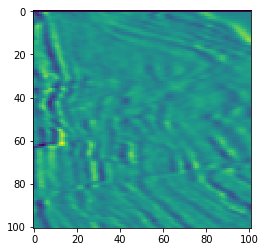

In [21]:
plt.imshow(dst)

In [31]:
cv2.imwrite('../../data/dfds.png',img)

True